In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [3]:
# df = pd.read_csv('../documents/data/previous_data/5555_eventos-edit.csv', index_col=0)
# df = df.drop('time', axis=1)

# # A preliminar analysis show that the base line value is the following:
# baseLine_value = 52.45771253239545
# # it'll not be necessary in a future analysis, cause the conversion parameters will be retrieved from the scope on the acquisition moment.

# waveforms = df - baseLine_value
# waveforms

In [7]:
df = pd.read_csv('../documents/data/1617480254.9367738/3018_events.csv', index_col=0)
waveforms = df[1:]
waveforms

C:\.Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_3008,event_3009,event_3010,event_3011,event_3012,event_3013,event_3014,event_3015,event_3016,event_3017
0,52.0,52.0,52.0,51.0,54.0,54.0,52.0,50.0,52.0,50.0,...,50.0,54.0,51.0,52.0,54.0,52.0,52.0,54.0,52.0,52.0
1,54.0,52.0,51.0,52.0,52.0,52.0,53.0,54.0,50.0,52.0,...,52.0,52.0,52.0,53.0,54.0,55.0,53.0,54.0,53.0,53.0
2,51.0,52.0,51.0,51.0,49.0,52.0,55.0,54.0,52.0,52.0,...,53.0,51.0,50.0,51.0,53.0,53.0,53.0,51.0,51.0,54.0
3,53.0,54.0,52.0,53.0,52.0,51.0,52.0,51.0,52.0,54.0,...,54.0,52.0,53.0,51.0,53.0,53.0,53.0,53.0,53.0,52.0
4,52.0,52.0,52.0,53.0,54.0,53.0,53.0,54.0,51.0,54.0,...,53.0,52.0,50.0,52.0,50.0,52.0,54.0,52.0,53.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,50.0,54.0,52.0,52.0,52.0,52.0,52.0,53.0,54.0,55.0,...,53.0,53.0,52.0,52.0,52.0,50.0,54.0,52.0,52.0,53.0
2496,53.0,54.0,50.0,52.0,51.0,53.0,54.0,53.0,53.0,53.0,...,53.0,53.0,52.0,53.0,52.0,53.0,52.0,52.0,52.0,51.0
2497,52.0,53.0,52.0,53.0,50.0,53.0,54.0,54.0,52.0,51.0,...,51.0,53.0,53.0,52.0,54.0,51.0,52.0,52.0,53.0,50.0
2498,52.0,53.0,53.0,53.0,53.0,52.0,52.0,53.0,52.0,53.0,...,53.0,53.0,53.0,54.0,53.0,52.0,53.0,54.0,53.0,54.0


In [8]:
# from FindPeaks.peaks import Find_Peaks_Waveforms
# Find_Peaks_Waveforms(waveforms=waveforms, height=0)

In [9]:
def plot_figure(column, limits=''):
    event = waveforms[column]
    x = list(  map( int,event.index.to_list() )  )
    y = event.to_list()
    plt.plot( x,y )
    if limits != '':
        plt.xlim(limits[0], limits[1])
    plt.title(f"{column}")
    plt.show()

In [10]:
problems = []
good = []
best = []
another = []
height = 0
step = 10

for i in range(waveforms.shape[1]):
    events = waveforms[ waveforms.columns[i] ]
    try:
        pk, _ = find_peaks(-1*events, height=height)
    except:
        problems.append(events.name)
    else:
        if len(pk) == 2:
            good.append(events.name)
            if pk[1] - pk[0] >= step:
                best.append(events.name)
        if len(pk) != 2:
            another.append(events.name)

print(f"\nResults\n")
print(f"  problems: {len(problems)}/{waveforms.shape[1]} ({round( 100*len(problems)/waveforms.shape[1] , 2 )})%")
print(f"  good: {len(good)}/{waveforms.shape[1]} ({round( 100*len(good)/waveforms.shape[1] , 2 )})%")
print(f"  best: {len(best)}/{waveforms.shape[1]} ({round( 100*len(best)/waveforms.shape[1] , 2 )})%")
print(f"  another: {len(another)}/{waveforms.shape[1]} ({round( 100*len(another)/waveforms.shape[1] , 2 )})%")



Results

  problems: 0/3018 (0.0)%
  good: 2927/3018 (96.98)%
  best: 607/3018 (20.11)%
  another: 91/3018 (3.02)%


# Perguntas:

Seria melhor manter como necessário para a aquisição que "len(peaks) == 2" e que "peaks_1 - peaks_0 > episolon"?

## Good

In [11]:
waveforms[good]

,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_3008,event_3009,event_3010,event_3011,event_3012,event_3013,event_3014,event_3015,event_3016,event_3017
0,52.0,52.0,52.0,51.0,54.0,54.0,52.0,50.0,52.0,50.0,...,50.0,54.0,51.0,52.0,54.0,52.0,52.0,54.0,52.0,52.0
1,54.0,52.0,51.0,52.0,52.0,52.0,53.0,54.0,50.0,52.0,...,52.0,52.0,52.0,53.0,54.0,55.0,53.0,54.0,53.0,53.0
2,51.0,52.0,51.0,51.0,49.0,52.0,55.0,54.0,52.0,52.0,...,53.0,51.0,50.0,51.0,53.0,53.0,53.0,51.0,51.0,54.0
3,53.0,54.0,52.0,53.0,52.0,51.0,52.0,51.0,52.0,54.0,...,54.0,52.0,53.0,51.0,53.0,53.0,53.0,53.0,53.0,52.0
4,52.0,52.0,52.0,53.0,54.0,53.0,53.0,54.0,51.0,54.0,...,53.0,52.0,50.0,52.0,50.0,52.0,54.0,52.0,53.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,50.0,54.0,52.0,52.0,52.0,52.0,52.0,53.0,54.0,55.0,...,53.0,53.0,52.0,52.0,52.0,50.0,54.0,52.0,52.0,53.0
2496,53.0,54.0,50.0,52.0,51.0,53.0,54.0,53.0,53.0,53.0,...,53.0,53.0,52.0,53.0,52.0,53.0,52.0,52.0,52.0,51.0
2497,52.0,53.0,52.0,53.0,50.0,53.0,54.0,54.0,52.0,51.0,...,51.0,53.0,53.0,52.0,54.0,51.0,52.0,52.0,53.0,50.0
2498,52.0,53.0,53.0,53.0,53.0,52.0,52.0,53.0,52.0,53.0,...,53.0,53.0,53.0,54.0,53.0,52.0,53.0,54.0,53.0,54.0


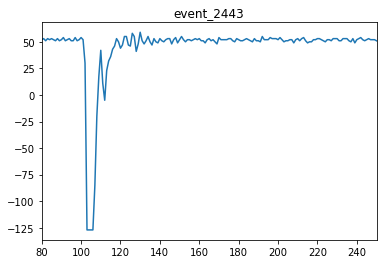

In [12]:
import random
plot_figure(column=random.choice(good), limits=[80,250])

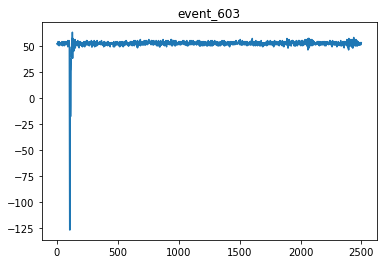

In [13]:
plot_figure(column='event_603')

## Best

In [14]:
waveforms[best]

,event_4,event_6,event_23,event_33,event_37,event_41,event_47,event_48,event_50,event_52,...,event_2972,event_2974,event_2984,event_2988,event_2992,event_2994,event_2996,event_3000,event_3009,event_3016
0,54.0,52.0,51.0,52.0,53.0,54.0,50.0,55.0,52.0,53.0,...,54.0,49.0,54.0,51.0,54.0,53.0,53.0,53.0,54.0,52.0
1,52.0,53.0,51.0,52.0,53.0,53.0,51.0,52.0,54.0,54.0,...,54.0,53.0,51.0,53.0,54.0,53.0,55.0,54.0,52.0,53.0
2,49.0,55.0,53.0,50.0,54.0,53.0,52.0,53.0,53.0,52.0,...,53.0,55.0,51.0,54.0,54.0,54.0,53.0,53.0,51.0,51.0
3,52.0,52.0,53.0,52.0,54.0,53.0,52.0,52.0,53.0,51.0,...,54.0,53.0,53.0,51.0,54.0,52.0,52.0,50.0,52.0,53.0
4,54.0,53.0,51.0,50.0,52.0,55.0,51.0,53.0,50.0,53.0,...,54.0,52.0,53.0,52.0,51.0,53.0,54.0,55.0,52.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,52.0,52.0,53.0,52.0,50.0,53.0,52.0,52.0,53.0,53.0,...,51.0,51.0,52.0,54.0,48.0,54.0,52.0,51.0,53.0,52.0
2496,51.0,54.0,52.0,53.0,52.0,55.0,53.0,55.0,53.0,51.0,...,51.0,54.0,52.0,54.0,54.0,53.0,51.0,51.0,53.0,52.0
2497,50.0,54.0,52.0,56.0,52.0,51.0,54.0,52.0,50.0,52.0,...,53.0,55.0,53.0,53.0,54.0,53.0,53.0,54.0,53.0,53.0
2498,53.0,52.0,50.0,54.0,52.0,51.0,53.0,53.0,53.0,52.0,...,52.0,53.0,53.0,54.0,53.0,53.0,51.0,54.0,53.0,53.0


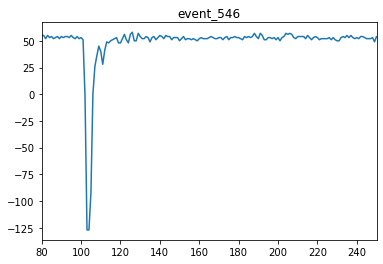

In [15]:
import random
plot_figure(column=random.choice(best), limits=[80,250])

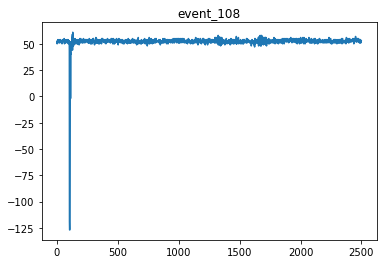

In [16]:
plot_figure(column='event_108')

## Another

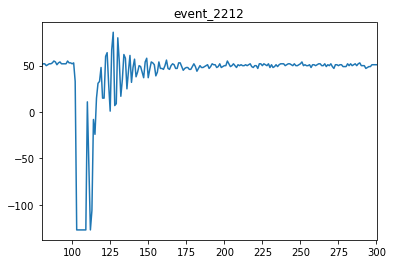

In [17]:
import random
plot_figure(column=random.choice(another), limits=[80,300])

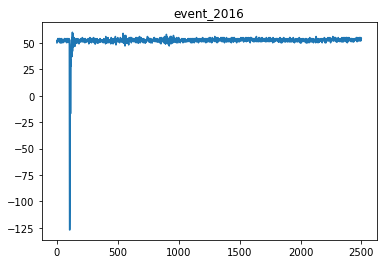

In [18]:
plot_figure(column='event_2016')

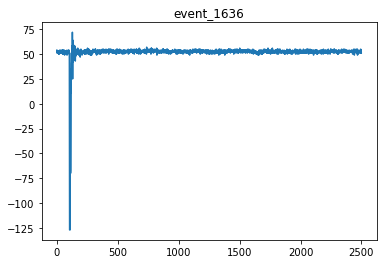

In [19]:
plot_figure(column='event_1636')

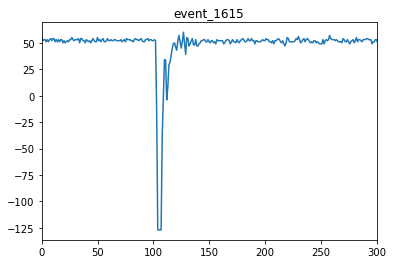

In [20]:
plot_figure(column='event_1615', limits=[0,300])

In [22]:
waveforms[another]

,event_54,event_66,event_89,event_92,event_111,event_113,event_250,event_341,event_381,event_385,...,event_2571,event_2626,event_2636,event_2689,event_2815,event_2816,event_2839,event_2847,event_2948,event_2979
0,53.0,51.0,2.0,52.0,55.0,53.0,53.0,53.0,53.0,51.0,...,53.0,52.0,54.0,51.0,54.0,51.0,54.0,54.0,51.0,52.0
1,53.0,50.0,88.0,53.0,53.0,52.0,53.0,53.0,53.0,54.0,...,54.0,51.0,52.0,54.0,52.0,54.0,53.0,53.0,52.0,52.0
2,52.0,51.0,93.0,52.0,52.0,52.0,52.0,54.0,55.0,53.0,...,52.0,54.0,53.0,52.0,52.0,52.0,51.0,53.0,51.0,54.0
3,53.0,51.0,-1.0,53.0,52.0,53.0,52.0,54.0,54.0,52.0,...,54.0,52.0,54.0,52.0,52.0,52.0,53.0,53.0,53.0,53.0
4,52.0,54.0,-7.0,53.0,52.0,54.0,52.0,52.0,54.0,52.0,...,53.0,52.0,55.0,53.0,53.0,51.0,51.0,53.0,51.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,53.0,53.0,21.0,54.0,51.0,52.0,53.0,53.0,52.0,52.0,...,51.0,54.0,54.0,50.0,14.0,52.0,54.0,54.0,52.0,53.0
2496,54.0,52.0,84.0,55.0,51.0,53.0,54.0,53.0,53.0,53.0,...,54.0,55.0,54.0,51.0,38.0,51.0,53.0,52.0,51.0,53.0
2497,52.0,52.0,74.0,53.0,52.0,54.0,51.0,52.0,51.0,53.0,...,53.0,53.0,54.0,53.0,104.0,52.0,51.0,52.0,50.0,54.0
2498,52.0,52.0,27.0,53.0,51.0,54.0,52.0,53.0,51.0,52.0,...,51.0,51.0,51.0,53.0,55.0,53.0,53.0,53.0,53.0,53.0


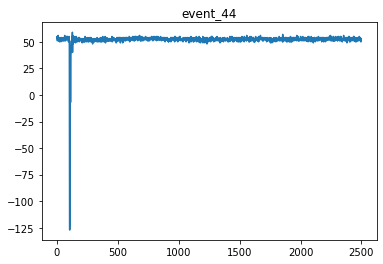

In [23]:
plot_figure(column='event_44')

In [24]:
from data_analyze.FindPeaks.peaks import Find_Peaks_Waveforms
Peaks = Find_Peaks_Waveforms(waveforms=df, height=10)
Peaks

ValueError: The events must have two peaks exactly. Please, check the "height" parameter.
Problem found on event_4.

In [ ]:
Peaks.query('peak_X1 - peak_X0 < 10')

In [ ]:
plot_figure(column='event_9')

In [ ]:
Peaks.query('peak_X1 - peak_X0 >= 10')

In [ ]:
plot_figure(column='event_20')

In [ ]:
from Analyze.results import Results_Analyze, plots_collection
df_filt, results = Results_Analyze(waveforms=waveforms, height=baseLine_value)

In [ ]:
df_filt.head()

In [ ]:
results.head()

In [ ]:
plots_collection(results=results)

In [ ]:
results_filt_integral = results.query("integrals_0 < integrals_1")
plots_collection(results_filt_integral)

In [ ]:
results_filt_peaks = results.query("peak_Y0 < 179 and peak_Y1 < 179")
plots_collection(results_filt_peaks)